# Autoencoder-classifier training

Here is a master notebook with visualization of autoencoders training process, classifier on each latent space representation training and general results description.

In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt

from src.data_loader import load_dataset
from src.utils import noise_and_clip
from src.autoencoder import Conv_AE, Var_AE, Denoising_AE
from src.train import ae_train
from src.classifier import clf_train

In [2]:
# Load the data
(c10_train, c10_train_y), (c10_test, c10_test_y) = load_dataset('CIFAR10')
(c100_train, c100_train_y), (c100_test, c100_test_y) = load_dataset('CIFAR100')

In [3]:
# Set parameters

latent_dims = [10, 20, 50, 100]
encoders = [Conv_AE, Var_AE]
encoder_names = ['Conv_AE', 'Var_AE']

datasets = [(c10_train, c10_test), (c100_train, c100_test)]
dataset_names = ['CIFAR10', 'CIFAR100']

history_ae = {}

## Autoencoder training

### CIFAR10

In [4]:
for model, name in zip(encoders, encoder_names):
    for latent_dim in latent_dims:
        ae = model(latent_dim=latent_dim)
        history = ae_train(ae, name, 
                           dataset_names[0], c10_train, c10_test, latent_dim)
        history_ae[(dataset_names[0], name, latent_dim)] = history.history['val_loss']

Epoch 1/20
782/782 [==============================] - 16s 21ms/step - loss: 0.0269 - val_loss: 0.0222
Epoch 2/20
782/782 [==============================] - 16s 20ms/step - loss: 0.0218 - val_loss: 0.0216
Epoch 3/20
782/782 [==============================] - 17s 22ms/step - loss: 0.0215 - val_loss: 0.0215
Epoch 4/20
782/782 [==============================] - 17s 22ms/step - loss: 0.0213 - val_loss: 0.0213
Epoch 5/20
782/782 [==============================] - 16s 20ms/step - loss: 0.0212 - val_loss: 0.0213
Epoch 6/20
782/782 [==============================] - 16s 20ms/step - loss: 0.0212 - val_loss: 0.0212
Epoch 7/20
782/782 [==============================] - 17s 22ms/step - loss: 0.0211 - val_loss: 0.0211
Epoch 8/20
782/782 [==============================] - 15s 20ms/step - loss: 0.0211 - val_loss: 0.0211
Epoch 9/20
782/782 [==============================] - 15s 20ms/step - loss: 0.0211 - val_loss: 0.0211
Epoch 10/20
782/782 [==============================] - 16s 20ms/step - loss: 0.021

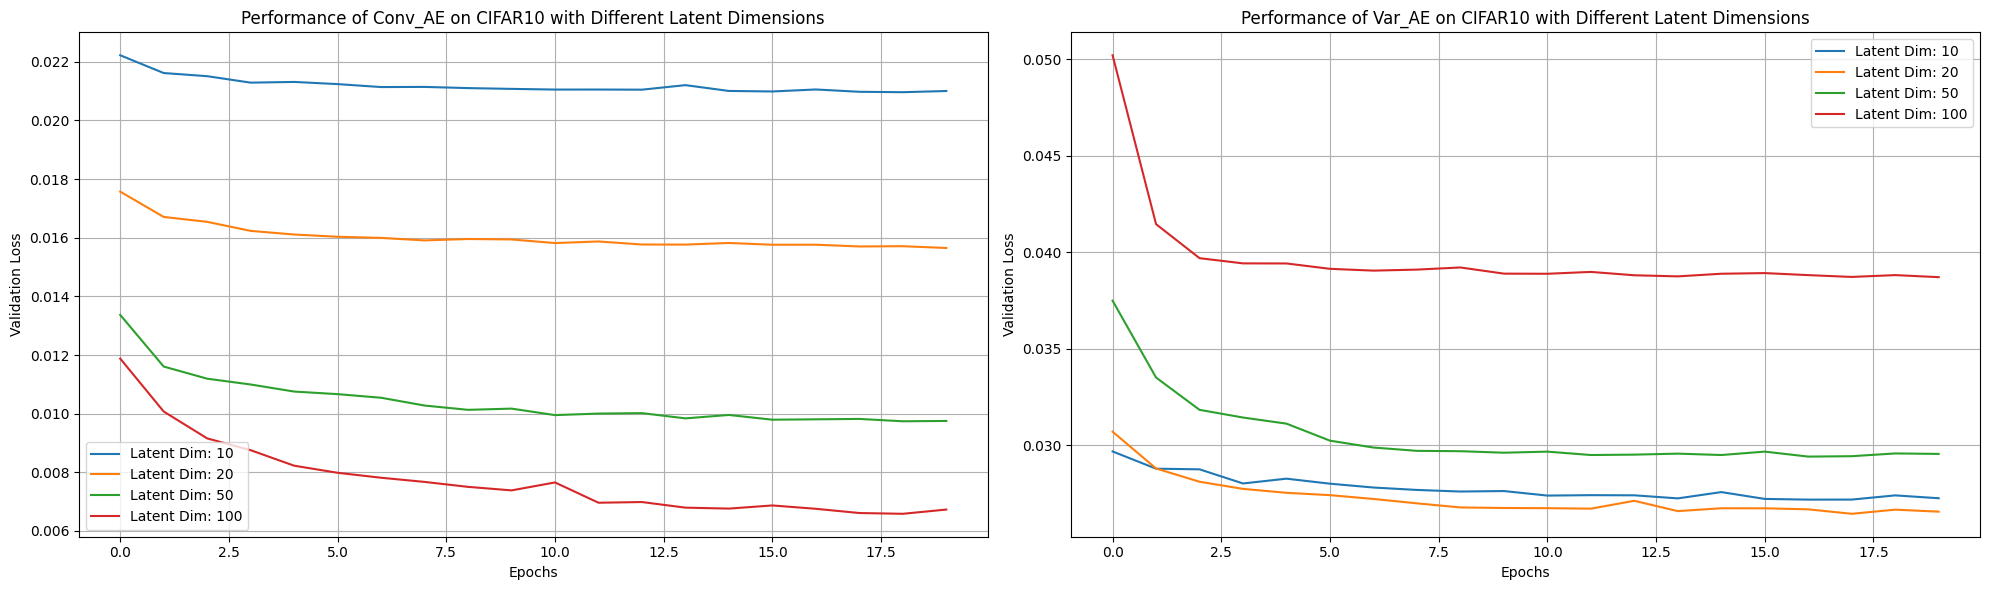

In [5]:
num_rows = 1
num_cols = len(encoder_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10*num_cols, 6))

for i, name in enumerate(encoder_names):
    ax = axes[i] if num_cols > 1 else axes  
    
    ax.set_title(f'Performance of {name} on {dataset_names[0]} with Different Latent Dimensions')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Validation Loss')
    ax.grid()
    
    for latent_dim in latent_dims:
        ax.plot(history_ae[(dataset_names[0], name, latent_dim)], label=f'Latent Dim: {latent_dim}')
    
    ax.legend()

plt.tight_layout()
plt.savefig('../reports/AE_CIFAR10_loss.png')
plt.show()

As it was expected, more complex Variational AE has more potential to train, but more tricky to find good parameters.

### CIFAR100

In [6]:
for model, name in zip(encoders, encoder_names):
    for latent_dim in latent_dims:
        ae = model(latent_dim=latent_dim)
        history = ae_train(ae, name, 
                           dataset_names[1], c100_train, c100_test, latent_dim)
        history_ae[(dataset_names[1], name, latent_dim)] = history.history['val_loss']

Epoch 1/20
782/782 [==============================] - 24s 30ms/step - loss: 0.0282 - val_loss: 0.0232
Epoch 2/20
782/782 [==============================] - 23s 29ms/step - loss: 0.0223 - val_loss: 0.0226
Epoch 3/20
782/782 [==============================] - 23s 30ms/step - loss: 0.0219 - val_loss: 0.0223
Epoch 4/20
782/782 [==============================] - 24s 30ms/step - loss: 0.0218 - val_loss: 0.0220
Epoch 5/20
782/782 [==============================] - 23s 29ms/step - loss: 0.0216 - val_loss: 0.0221
Epoch 6/20
782/782 [==============================] - 21s 27ms/step - loss: 0.0216 - val_loss: 0.0219
Epoch 7/20
782/782 [==============================] - 19s 24ms/step - loss: 0.0215 - val_loss: 0.0219
Epoch 8/20
782/782 [==============================] - 20s 26ms/step - loss: 0.0214 - val_loss: 0.0218
Epoch 9/20
782/782 [==============================] - 20s 25ms/step - loss: 0.0214 - val_loss: 0.0218
Epoch 10/20
782/782 [==============================] - 19s 25ms/step - loss: 0.021

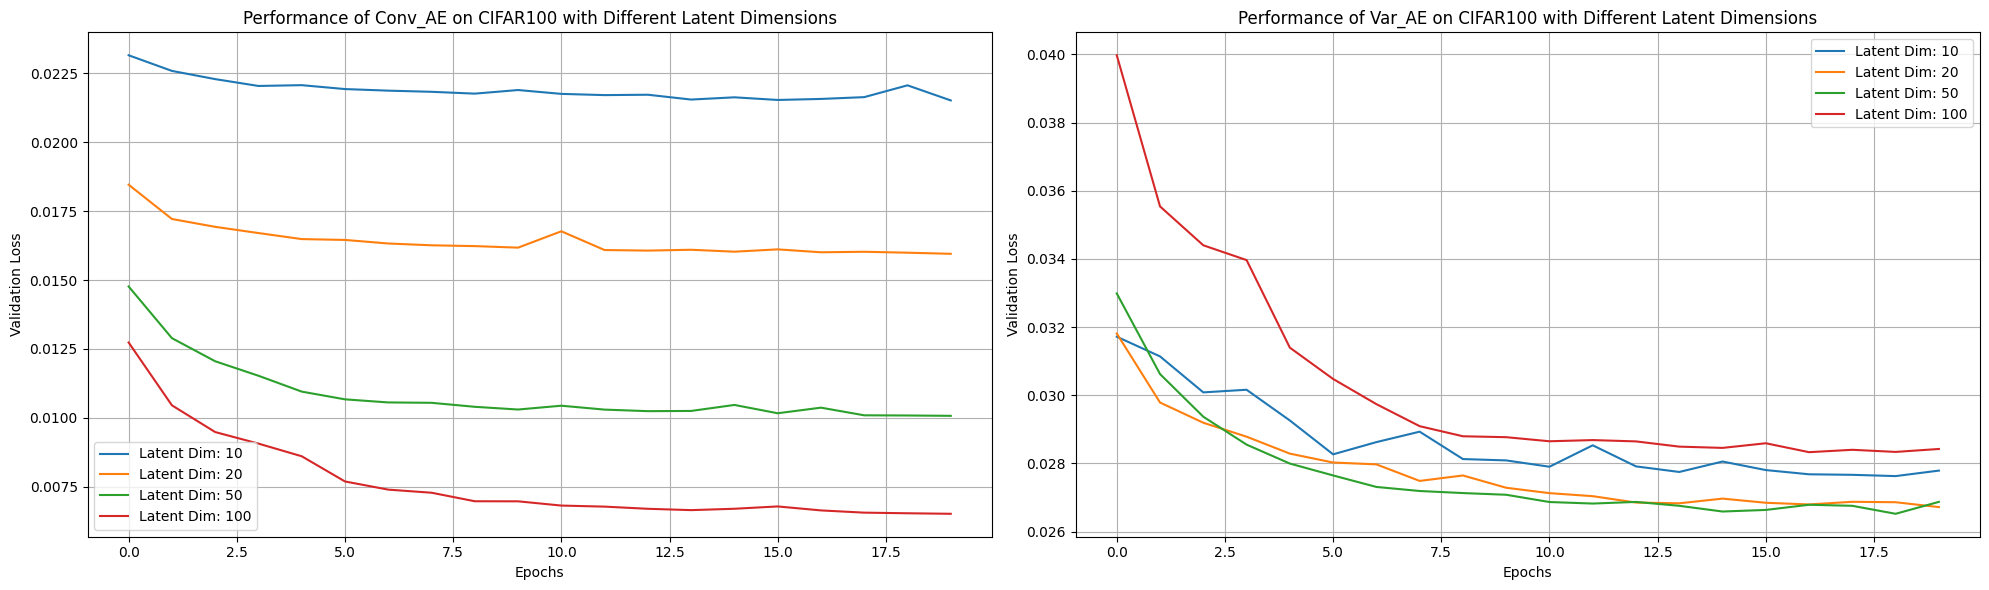

In [7]:
num_rows = 1
num_cols = len(encoder_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10*num_cols, 6))

for i, name in enumerate(encoder_names):
    ax = axes[i] if num_cols > 1 else axes  
    
    ax.set_title(f'Performance of {name} on {dataset_names[1]} with Different Latent Dimensions')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Validation Loss')
    ax.grid()
    
    for latent_dim in latent_dims:
        ax.plot(history_ae[(dataset_names[1], name, latent_dim)], label=f'Latent Dim: {latent_dim}')
    
    ax.legend()

plt.tight_layout()
plt.savefig('../reports/AE_CIFAR100_loss.png')
plt.show()

### Summary

The latent space size is a hyper parameter that we might want to adjust based on the data complexity. However there is kind of tradeof task, because larger latents space make VAE less robust and more difficult to train and potentially could lead to overfitting.

## Classifier training

Conv_AE
10
313/313 [==============================] - 1s 2ms/step
Epoch 1/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8031 - accuracy: 0.3504 - val_loss: 1.7342 - val_accuracy: 0.3735
Epoch 2/10
1563/1563 [==============================] - 1s 952us/step - loss: 1.7313 - accuracy: 0.3733 - val_loss: 1.7091 - val_accuracy: 0.3808
Epoch 3/10
1563/1563 [==============================] - 1s 954us/step - loss: 1.7035 - accuracy: 0.3848 - val_loss: 1.6947 - val_accuracy: 0.3875
Epoch 4/10
1563/1563 [==============================] - 2s 972us/step - loss: 1.6842 - accuracy: 0.3925 - val_loss: 1.7030 - val_accuracy: 0.3836
Epoch 5/10
1563/1563 [==============================] - 1s 953us/step - loss: 1.6713 - accuracy: 0.3956 - val_loss: 1.6984 - val_accuracy: 0.3908
Epoch 6/10
1563/1563 [==============================] - 2s 975us/step - loss: 1.6568 - accuracy: 0.4025 - val_loss: 1.6955 - val_accuracy: 0.3923
Epoch 7/10
1563/1563 [==============================] - 1s 9

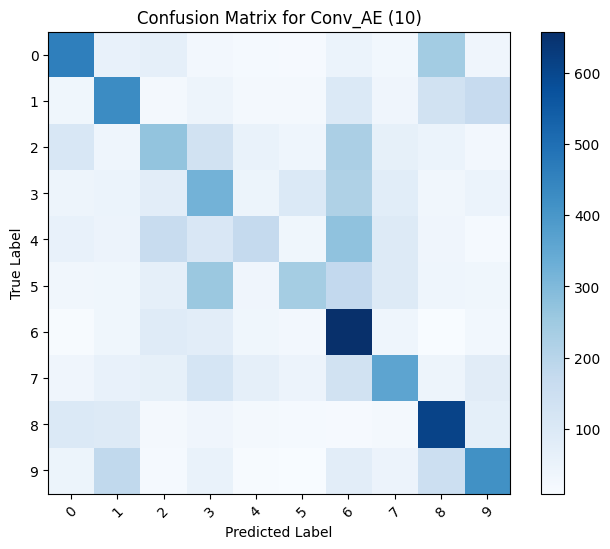

Conv_AE
20
313/313 [==============================] - 1s 2ms/step
Epoch 1/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7562 - accuracy: 0.3703 - val_loss: 1.6395 - val_accuracy: 0.4140
Epoch 2/10
1563/1563 [==============================] - 2s 967us/step - loss: 1.6184 - accuracy: 0.4230 - val_loss: 1.5930 - val_accuracy: 0.4285
Epoch 3/10
1563/1563 [==============================] - 1s 891us/step - loss: 1.5677 - accuracy: 0.4385 - val_loss: 1.5869 - val_accuracy: 0.4393
Epoch 4/10
1563/1563 [==============================] - 1s 936us/step - loss: 1.5321 - accuracy: 0.4516 - val_loss: 1.5767 - val_accuracy: 0.4385
Epoch 5/10
1563/1563 [==============================] - 1s 914us/step - loss: 1.5021 - accuracy: 0.4625 - val_loss: 1.5595 - val_accuracy: 0.4517
Epoch 6/10
1563/1563 [==============================] - 1s 904us/step - loss: 1.4787 - accuracy: 0.4695 - val_loss: 1.5620 - val_accuracy: 0.4489
Epoch 7/10
1563/1563 [==============================] - 1s 9

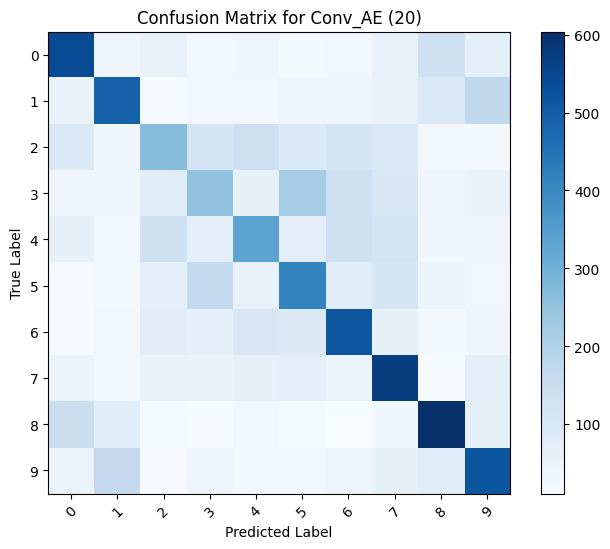

Conv_AE
50
313/313 [==============================] - 1s 2ms/step
Epoch 1/10
1563/1563 [==============================] - 2s 944us/step - loss: 1.7592 - accuracy: 0.3684 - val_loss: 1.6431 - val_accuracy: 0.4167
Epoch 2/10
1563/1563 [==============================] - 1s 956us/step - loss: 1.6172 - accuracy: 0.4237 - val_loss: 1.5890 - val_accuracy: 0.4351
Epoch 3/10
1563/1563 [==============================] - 1s 881us/step - loss: 1.5488 - accuracy: 0.4454 - val_loss: 1.5493 - val_accuracy: 0.4451
Epoch 4/10
1563/1563 [==============================] - 1s 904us/step - loss: 1.5027 - accuracy: 0.4646 - val_loss: 1.4962 - val_accuracy: 0.4670
Epoch 5/10
1563/1563 [==============================] - 1s 880us/step - loss: 1.4647 - accuracy: 0.4739 - val_loss: 1.4951 - val_accuracy: 0.4662
Epoch 6/10
1563/1563 [==============================] - 2s 975us/step - loss: 1.4344 - accuracy: 0.4866 - val_loss: 1.4588 - val_accuracy: 0.4861
Epoch 7/10
1563/1563 [==============================] - 1s

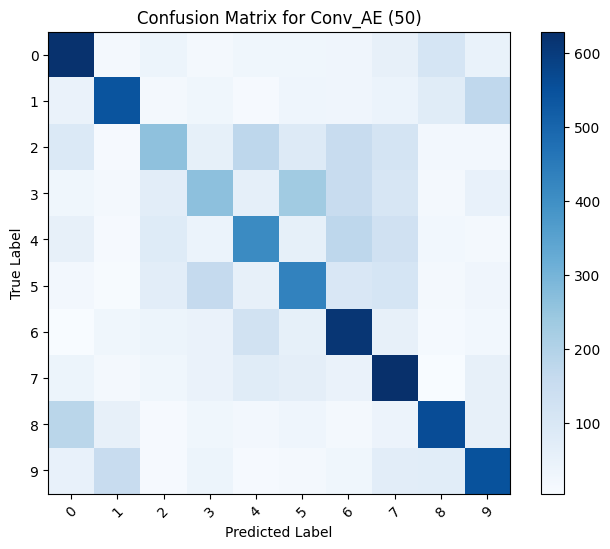

Conv_AE
100
313/313 [==============================] - 1s 2ms/step
Epoch 1/10
1563/1563 [==============================] - 2s 898us/step - loss: 1.7723 - accuracy: 0.3644 - val_loss: 1.6192 - val_accuracy: 0.4217
Epoch 2/10
1563/1563 [==============================] - 1s 925us/step - loss: 1.5790 - accuracy: 0.4380 - val_loss: 1.5370 - val_accuracy: 0.4476
Epoch 3/10
1563/1563 [==============================] - 1s 901us/step - loss: 1.5031 - accuracy: 0.4638 - val_loss: 1.4832 - val_accuracy: 0.4730
Epoch 4/10
1563/1563 [==============================] - 1s 899us/step - loss: 1.4523 - accuracy: 0.4816 - val_loss: 1.4565 - val_accuracy: 0.4724
Epoch 5/10
1563/1563 [==============================] - 1s 901us/step - loss: 1.4104 - accuracy: 0.4964 - val_loss: 1.4306 - val_accuracy: 0.4906
Epoch 6/10
1563/1563 [==============================] - 1s 873us/step - loss: 1.3746 - accuracy: 0.5088 - val_loss: 1.4339 - val_accuracy: 0.4860
Epoch 7/10
1563/1563 [==============================] - 1

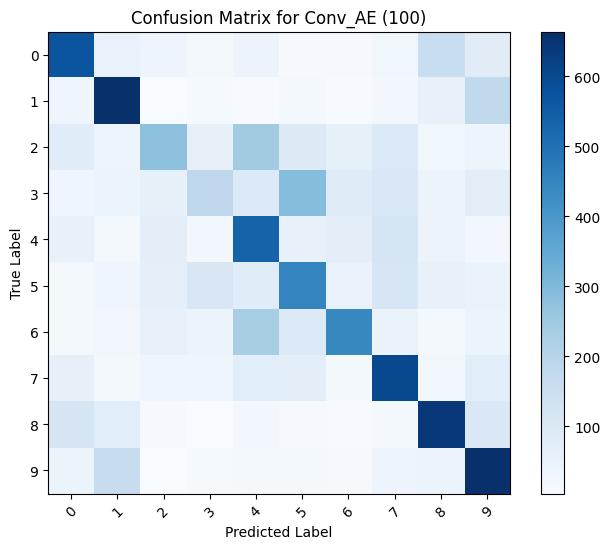

In [5]:
# Loop through the encoders and latent dimensions
i = 0
for latent_dim in latent_dims:
    print(encoder_names[i])
    print(latent_dim)
    classifier, history = clf_train(encoders[i], encoder_names[i], latent_dim, 'CIFAR10', c10_train, c10_train_y, c10_test, c10_test_y)

## General Summary

### Futher steps

- More image preprocessing not only normalization (add advansed training on noised dataset)

#### Noised dataset

In [ ]:
c100_train_noise = noise_and_clip(c100_train) 
c100_test_noise = noise_and_clip(c100_test)

In [ ]:
idx = 5

plt.subplot(1,2,1) 
plt.imshow(c100_train[idx]) 
plt.title('Original image') 

plt.subplot(1,2,2) 
plt.imshow(c100_train_noise[idx]) 
plt.title('Image with noise') 

plt.show()

Also, pretrained noise reconstruction encoder can be implement in a pipeline

- More advanced encoder-decoder artitecutes with GPU train should improve results

- Try different types of classifiers

- Transfer learning, it is interesting to try pretrained models as encoders like VGG16, ResNet

### Conclution

It's noteable that the size of the latent space plays a crucial role in balancing the level of abstraction and preservation of original data features. Therefore, the choice of latent space size is task-dependent and might need experementation.